# Poster GDR Vision

This poster was presented in Lille at a vision workshop, check out http://invibe.net/LaurentPerrinet/Publications/Perrinet17gdr

Apart the content (which is in French) which recaps some previous work inbetween art and science, this post demonstrates how to generate a A0 poster *programmatically*. In particular, we will use matplotlib and some quickly forged functions to ease up the formatting.

<!-- TEASER_END -->

## contenu: Expériences autour de la perception de la forme en art et science

La vision utilise un faisceau d'informations de différentes qualités pour atteindre une perception unifiée du monde environnant. Nous avons utilisé lors de plusieurs projets art-science (voir https://github.com/NaturalPatterns) des installations permettant de manipuler explicitement des composantes de ce flux d'information et de révéler des ambiguités dans notre perception. 

Dans l'installation «Tropique», des faisceaux de lames lumineuses sont arrangés dans l'espace assombri de l'installation. Les spectateurs les observent grâce à leur interaction avec une brume invisible qui est diffusée dans l'espace. Dans «Trame Élasticité», 25 parallélépipède de miroirs (3m de haut) sont arrangés verticalement sur une ligne horizontale. Ces lames sont rotatives et leurs mouvements est synchronisé. Suivant la dyamique qui est imposé à ces lames, la perception de l’espace environnent fluctue conduisant à recomposer l’espace de la concentration à l’expansion, ou encore à générer un surface semblant transparente ou inverser la visons de ce qui est située devant et derrière l’observateur. Enfin, dans «Trame instabilité», nous explorons l'interaction de séries périodiques de points placées sur des surfaces transparentes. À partir de premières expérimentations utilisant une technique novatrice de sérigraphie, ces trames de points sont placées afin de faire émerger  des structures selon le point de vue du spectateur. De manière générale, nous montrerons ici les différentes méthodes utilisées, comme l'utilisation des limites perceptives, et aussi les résultats apportés par une telle collaboration.

 * poster présenté au [[https://gdrvision2017.sciencesconf.org/|GDR vision, Lille]].
 * abstract: https://github.com/NaturalPatterns/2017-10-12_GDR/raw/master/2017-10-12_PerrinetRey2017abstract_168363.pdf
 * poster : https://github.com/NaturalPatterns/2017-10-12_GDR/raw/master/2017-10-12_PerrinetRey2017poster.pdf
 * poster (code) : https://github.com/NaturalPatterns/2017-10-12_GDR/blob/master/2017-10-12_PerrinetRey2017poster.ipynb
 * more code : https://github.com/NaturalPatterns


In [1]:
from __future__ import division, print_function
%matplotlib inline
%config InlineBackend.figure_format='retina'
#%config InlineBackend.figure_format = 'svg'
import numpy as np
np.set_printoptions(precision=6, suppress=True)
import os
import imageio
#
import matplotlib
import matplotlib.pyplot as plt
# CONSTANTS
phi = np.sqrt(2) # A0  (np.sqrt(5)+1)/2
inch_per_cm = 0.3937008
bg_color = 'white'
# 
if True: # DEBUG
    A_N = 4 # use 0 for A0, 4 for A4
    DOWNSCALE = 3
else:
    A_N = 0 # use 0 for A0, 4 for A4
    DOWNSCALE = 1
#
print('paper size = A' + str(A_N))
fig_width = np.sqrt(np.sqrt(2)) * 100 * 2**(-A_N) / inch_per_cm
figsize = (fig_width, fig_width*phi)
%load_ext autoreload
%autoreload 2

paper size = A4


## Title banner

Abstract original::

Dans l'installation Tropique, des faisceaux de lames lumineuses sont arrangés dans l'espace assombri 
de l'installation. Les spectateurs les observent grâce à leur interaction avec une brume invisible qui est 
diffusée dans l'espace. L'ensemble des faisceaux évolue comme autant de lames lumineuses à partir de 6 
video-projecteurs placés dans l'espace de l'installation, suivant une dynamique autonome. En même temps, 
la position des spectateurs est captée et permet d'alterner entre une vision de ces sculptures d'un point 
de vue introceptif à un point de vue exteroceptif. Dans Elasticité dynamique, 25 parallélépipède de miroirs 
(3m de haut) sont arrangés verticalement sur une ligne horizontale. Ces lames sont rotatives et  leurs mouvements
est synchronisé. Suivant la dyamique qui est imposé à ces lames, la perception de l’espace environnent fluctue suivant, 
par exemple une vague de propagation, des effets de lentilles de Fresnel…. Conduisant à recomposer l’espace de
la concentration à l’expansion, ou encore à générer un surface semblant transparente ou inverser la visons
de ce qui est située devant et derrière l’observateur. Enfin, dans Trames, nous explorons l'interaction 
de séries périodiques de points placées sur des surfaces transparentes. A partir de premières expérimentations 
utilisant une technique novatrice de sérigraphie, ces trames de points sont placées afin de faire émerger 
des structures selon le point de vue du spectateur. De manière générale, nous montrerons ici les différentes
méthodes utilisées et aussi les résultats apportés par une telle collaboration.



In [2]:
xs, ys = [.05, .15, .1, .1, .1, .1] , [.9, .8, .72, .68, .1, .05]
fontsizes = [42, 32, 20, 20, 15, 20]
texts = ["Expériences autour de la perception de la forme en art et science", #Exploration des composantes de la perception lors d'un expérience mêlant art et science",
         "Laurent Perrinet$^1$ et Etienne Rey$^2$", 
         "1 - Institut de Neurosciences de la Timone (INT) – Aix Marseille Université CNRS, UMR7289 – 27, Bd Jean Moulin - 13385 Marseille, https://invibe.net",
         "2 - Atelier des Ondes Paralleles, La Friche la Belle de Mai, 41, rue Jobin, 13003 Marseille, etiennerey@ondesparalleles.org, http://ondesparalleles.org/",
         """\
La vision utilise un faisceau d'informations de différentes qualités pour atteindre une
perception unifiée du monde environnant. Nous avons utilisé lors de plusieurs projets 
art-science (voir https://github.com/NaturalPatterns) des installations permettant 
de manipuler explicitement des composantes de ce flux d'information et de révéler des  
ambiguités dans notre perception. 

Dans l'installation «Tropique», des faisceaux de lames lumineuses sont arrangés dans l'espace assombri 
de l'installation. Les spectateurs les observent grâce à leur interaction avec une brume invisible qui est 
diffusée dans l'espace. Dans «Trame Élasticité», 25 parallélépipède de miroirs 
(3m de haut) sont arrangés verticalement sur une ligne horizontale. Ces lames sont rotatives et leurs mouvements
est synchronisé. Suivant la dyamique qui est imposé à ces lames, la perception de l’espace environnent fluctue 
conduisant à recomposer l’espace de
la concentration à l’expansion, ou encore à générer un surface semblant transparente ou inverser la visons
de ce qui est située devant et derrière l’observateur. Enfin, dans «Trame instabilité», nous explorons l'interaction 
de séries périodiques de points placées sur des surfaces transparentes. À partir de premières expérimentations 
utilisant une technique novatrice de sérigraphie, ces trames de points sont placées afin de faire émerger 
des structures selon le point de vue du spectateur. De manière générale, nous montrerons ici les différentes
méthodes utilisées, comme l'utilisation des limites perceptives, et aussi les résultats apportés par une telle collaboration.
""",
"Mots-Clés: art cinétique ; science ; vision ; perception ; modèle interne"
        ]
image_logo = 'http://blog.invibe.net/files/2016-07-07_EDP-proba/figures/troislogos.png'

def wrap(s, width=70, verbose=False):
    """
    This function takes any wrapped or unwrapped text and then wraps it to a given width.
    
    We are careful to keep a carriage return (as a '\n\n') to separate paragraphs.
    
    """
    import textwrap
    s_output = ""
    for p in s.split('\n\n'):
        s_unwrap = "".join(p).replace(' \n', ' ').replace('\n', ' ').replace('  ', ' ')
        if verbose: print('Unwrapping:', s_unwrap)
        s_clean = textwrap.dedent(s_unwrap).replace('  ', ' ').replace('  ', ' ')
        if verbose: print('Cleaning:', s_clean)
        if width>0:
            s_wrap = textwrap.fill(s_clean, width=width)
        else:
            s_wrap = s_clean
        if verbose: print('Wrapping:', s_wrap)
        s_output += s_wrap + '\n'
    return s_output
texts[-2] = wrap(texts[-2], width=90, verbose=True)
print(texts[-2])

Unwrapping: La vision utilise un faisceau d'informations de différentes qualités pour atteindre une perception unifiée du monde environnant. Nous avons utilisé lors de plusieurs projets art-science (voir https://github.com/NaturalPatterns) des installations permettant de manipuler explicitement des composantes de ce flux d'information et de révéler des ambiguités dans notre perception. 
Cleaning: La vision utilise un faisceau d'informations de différentes qualités pour atteindre une perception unifiée du monde environnant. Nous avons utilisé lors de plusieurs projets art-science (voir https://github.com/NaturalPatterns) des installations permettant de manipuler explicitement des composantes de ce flux d'information et de révéler des ambiguités dans notre perception. 
Wrapping: La vision utilise un faisceau d'informations de différentes qualités pour atteindre une
perception unifiée du monde environnant. Nous avons utilisé lors de plusieurs projets art-
science (voir https://github.com/

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
#help(inset_axes)

def color_axis(ax, color=bg_color):
    # Start coloring

    ax.set_xticks(())
    ax.set_yticks(())
    for pos in ['top', 'bottom', 'right', 'left']: ax.spines[pos].set_edgecolor(color)


Axes(0,0;1x1)


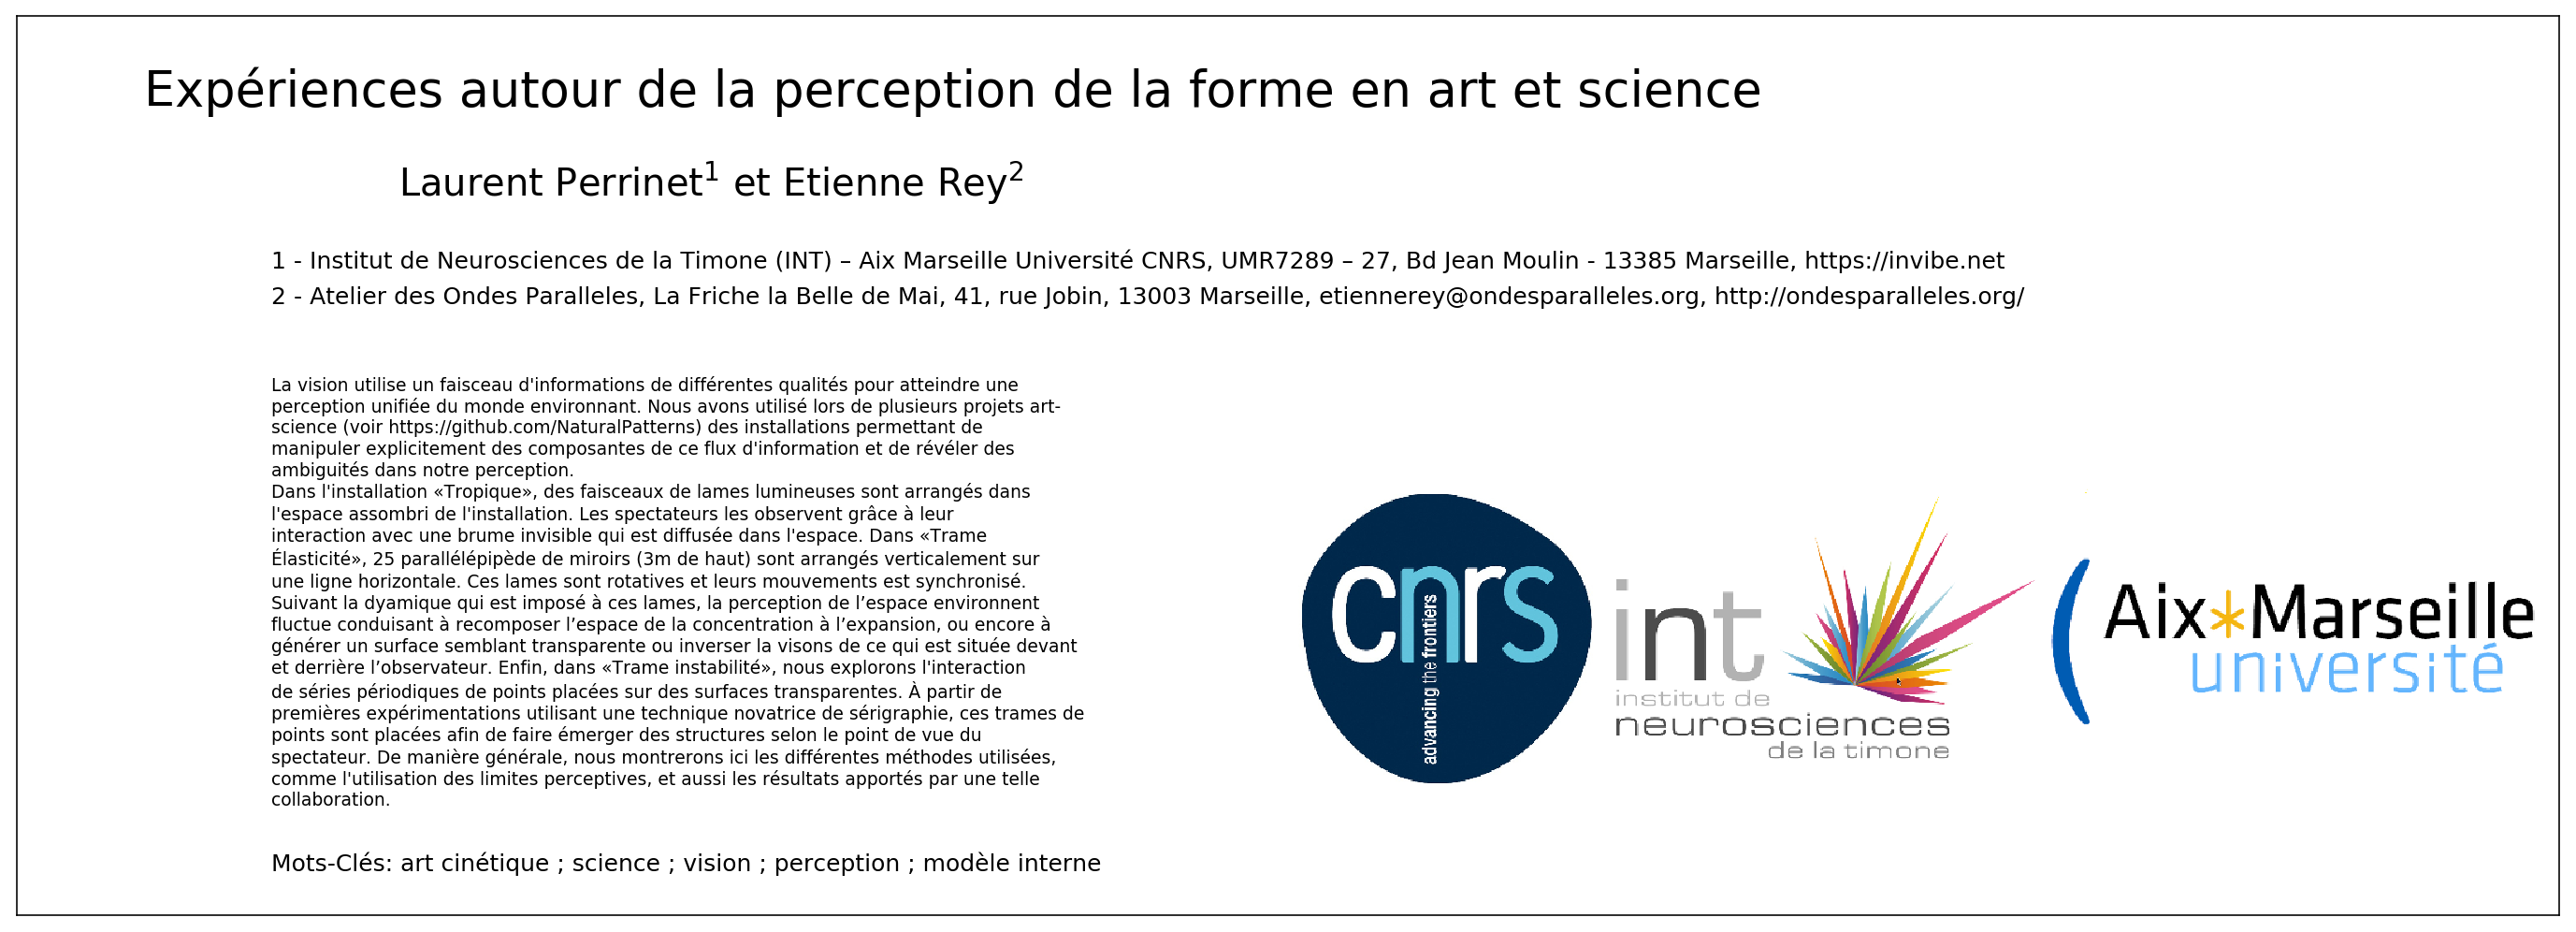

In [4]:
subplotpars = matplotlib.figure.SubplotParams(left=0., right=1., bottom=0., top=1., wspace=0.0, hspace=0.0,)
fig, axs = plt.subplots(1, 1, figsize=(figsize[0], figsize[1]/4), subplotpars=subplotpars)
ax = axs#[0]

for x, y, text, fontsize in zip(xs, ys, texts, fontsizes):
    ax.text (s=text, x=x, y=y, usetex=False, wrap=True, 
             transform=ax.transAxes, fontsize=fontsize * 10*2**(-A_N)) # bbox=dict(facecolor='red', alpha=0.5))

ax.set_xticks(())
ax.set_yticks(())

axins = inset_axes(ax,
                   #bbox_to_anchor = [10, 10],
                   width="50%",  # width = 30% of parent_bbox
                   height= 4* 2**(4-A_N),  # width = 30% of parent_bbox
                   loc=4, 
                  # axes_kwargs=dict(fc='red', edgecolor='b')
                  )

print(axins)
#axins.text (s=text, x=x, y=y, usetex=False, wrap=True, 
#             transform=ax.transAxes, fontsize=fontsize * 10*2**(-A_N)) # bbox=dict(facecolor='red', alpha=0.5))
axins.imshow(imageio.imread(image_logo)[::DOWNSCALE, ::DOWNSCALE, ...])
color_axis(axins)

## définition des variables

In [5]:
!curl https://github.com/NaturalPatterns/Tropique/raw/master/photos -o /tmp/EtienneRey-Tropique-2011-C.JPG

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   128  100   128    0     0    220      0 --:--:-- --:--:-- --:--:--   220


In [6]:
image_tropique = '../2013_Tropique/photos/EtienneRey-Tropique-2011-C.JPG'
image_elasticité = '../2016_elasticite/photos/E-REY-TRAME_Elasticité-Vasarely.JPG'
image_trame = '../pyTRAMES/files/2017-10-03_instabilité_N_pix=9449-R_dis=1.50-theta=29.00 deg-freq_A=0.07-R_dis_A=1.50-freq_B=0.03-R_dis_B=1.51-seuil_A=0.70-seuil_B=0.75-gain=10.00_render.png'
image_trame = '../pyTRAMES/files/2017-10-03_instabilité_N_pix=9449-R_dis=1.50-theta=29.00 deg-freq_A=0.07-R_dis_A=1.50-freq_B=0.03-R_dis_B=1.51-seuil_A=0.70-seuil_B=0.75-gain=10.00_render.png'


tag = '2017-10-12_PerrinetRey2017poster'

output = tag + '.pdf'

In [7]:
import imageio
for filename in [image_tropique, image_elasticité, image_trame]:
    print('filename', filename)
    image = imageio.imread(filename)
    print ('The shape of', filename, ' is', image.shape)

filename ../2013_Tropique/photos/EtienneRey-Tropique-2011-C.JPG
The shape of ../2013_Tropique/photos/EtienneRey-Tropique-2011-C.JPG  is (2848, 4288, 3)
filename ../2016_elasticite/photos/E-REY-TRAME_Elasticité-Vasarely.JPG
The shape of ../2016_elasticite/photos/E-REY-TRAME_Elasticité-Vasarely.JPG  is (3840, 5760, 3)
filename ../pyTRAMES/files/2017-10-03_instabilité_N_pix=9449-R_dis=1.50-theta=29.00 deg-freq_A=0.07-R_dis_A=1.50-freq_B=0.03-R_dis_B=1.51-seuil_A=0.70-seuil_B=0.75-gain=10.00_render.png
The shape of ../pyTRAMES/files/2017-10-03_instabilité_N_pix=9449-R_dis=1.50-theta=29.00 deg-freq_A=0.07-R_dis_A=1.50-freq_B=0.03-R_dis_B=1.51-seuil_A=0.70-seuil_B=0.75-gain=10.00_render.png  is (4800, 4800, 4)


The aspect ratio of one band is:

In [8]:
aspect_ratio = 1 / (np.sqrt(2)/4)
print ('aspect ratio (width/height) =', aspect_ratio)

aspect ratio (width/height) = 2.82842712475


In [9]:
data_tropique = dict(title='Tropique (2013)', fontsize=42*2**(4-A_N), description="""
Dans l'installation Tropique, des faisceaux de lames lumineuses 
sont arrangés dans l'espace assombri de l'installation. Les spectateurs 
les observent grâce à leur interaction avec une brume invisible qui est 
diffusée dans l'espace. L'ensemble des faisceaux évolue comme autant de 
lames lumineuses à partir de 6 video-projecteurs placés dans l'espace 
de l'installation, suivant une dynamique autonome. En même temps, la 
position des spectateurs est captée et permet d'alterner entre une vision 
de ces sculptures d'un point de vue introceptif à un point de vue exteroceptif.
Installation immersive, Tropique un espace vide de matière. le visiteur plonge 
au cœur d’un espace embrumé, sculpté par la lumière et le son.
Ce monde doté d’intelligence perceptive réagit à la présence des visiteurs, 
construisant un espace dynamique, dans lequel les gestes et les comportements 
perturbent et enrichissent un élément préexistant.

Le mot Tropique désigne une ligne terrestre imaginaire où le soleil atteint 
le zénith à un moment précis, au solstice d’hiver et d’été.
L’installation Tropique est l’expression de l’ici et maintenant, du hic et 
du nunc à une position, une date et une heure précises où s’explore un monde en relation.
L’installation Tropique propose à celui qui fait l’expérience à la fois 
plastique et scientifique de l’œuvre de rendre perceptible des structures de 
l’espace et de saisir la manière dont travaille notre système perceptif 
et, ce faisant, notre manière d’appréhender le monde
""", 
                     color = 'w',
                     alpha = 0.01, # transparency of a bbox
                     width = 70,
                     cartel="""
DISTRIBUTION: http://ondesparalleles.org/projets/tropique-7/
RÉALISATION: 
- Etienne Rey, artiste plasticien
- Laurent Perrinet, Chercheur en Neurosciences à l’INT / CNRS
- Wilfried Wendling, Compositeur
- Julien Marro Dauzat, Ingénieur, Biogène
CO-PRODUCTION
- Marseille-Provence 2013
- IMéRA, Institut Méditerranéen de Recherches Avancées
- GMEM – Centre National de Création Musicale
- Ososphère / Quatre 4.0
- Centre des Arts d’Enghien-les-Bains
- CNRS / INT, Institut de Neurosciences de la Timone
PRODUCTION DÉLÉGUÉE
- Seconde Nature
- SOUTIENT
- Région PACA
- CNC Dicréam
PRIX
- Lauréat des Mécènes du Sud
- Lauréat du RAN, Réseau Arts Numériques
EXPOSITIONS:
- Résidence à l’INT / CNRS
- Avant Première – Festival Ososphère / Strasbourg
- Fondation Vasarely Marseille Capitale de la culture, Aix-en-Provence
""")

data_elasticité = dict(title='Trame Élasticité (2016)', fontsize=42*2**(4-A_N), description="""
Les oeuvres d’Etienne Rey créent des expériences de l’espace où 
lumière, vision et déplacement modulent notre perception. Ce travail 
marque une continuité des questions initiées par Victor Vasarely, en 
particulier sur la relation directe à une dimension perceptuelle.

Dans le cadre de «MultipliCITÉ», le plasticien Etienne Rey, 
lauréat 2016 du Prix de la Fondation Vasarely pour les arts numériques 
(jury : Seconde Nature, Mécènes du Sud, EDIS, Fondation Vasarely, Musée 
Vouland, Galerie Denise René), a été invité à présenter une série de 
créations sur les trois lieux de l’hommage triptyque.

À la Fondation Vasarely à Aix-en-Provence, Etienne Rey a choisi d’installer 
dans la salle des «Intégrations architectoniques» un ballet visuel hypnotique. 
Composé d’une succession de lames de miroirs, verticales et rotatives, 
l’installation «Trame Élasticité» se joue des reflets et de la démultiplication de 
l’espace, offrant au spectateur une multiplicité de points de vue dans 
lesquels il peut se perdre à loisir. Par un effet de «porosité» recherché 
par l’artiste, le dispositif dialogue intensément avec les Intégrations.
Devant l’œuvre en constante métamorphose, l’alphabet plastique de Vasarely 
se recompose ainsi à l’infini comme un jeu de construction renouvelable. 
Dans cette œuvre, Etienne Rey explore en profondeur les possibilités offertes 
par le mouvement, la lumière, et surtout l’interaction entre l’œuvre, le 
public et l’espace, ouvrant sur de nouveaux rapports sensibles et sensoriels au monde.
""", 
                     color='w',
                     alpha=0.01, # transparency of a bbox
                     width = 73,
                     cartel="""
RÉALISATION: 
- Etienne Rey - artiste plasticien
- Laurent Perrinet - chercheur en neurosciences à l'INT / CNRS-AMU
- Atelier Ni - accompagnement conception
- Gauthier Le Rouzic - électronique
PRODUCTION DÉLÉGUÉE:
- Seconde Nature
SOUTIENS:
- DRAC PACA - aide individuelle à la création
- RÉGION PACA - CAC art visuel
CO-PRODUCTION:
- ARCADI
- La Muse en Circuit, Centre National de Création Musicale
- CNRS-AMU / INT, Institut de Neurosciences de la Timone
EXPOSITIONS:
- Avant-Première: NEMO (Arts Numeriques), 104, Paris
- MultipliCITÉ, Fondation Vasarely, Aix-en-Provence
""")


data_instabilité = dict(title='Trame Instabilité', fontsize=42*2**(4-A_N), description="""
«Trame instabilité» est un travail en cours de recherche. Le projet est basé 
sur des principes d’occultations partielles en couches associées à des trames 
qui font émerger une dimension immatérielle. L’expérience de perception de ces 
motifs produit un sentiment de basculement de la perception dans le sens où le 
motifs réel passe au second plan pour laisser place à l’émergence d’une figure 
du vide, c’est dans les blancs immatériel que des formes apparaissent et vacillent 
occupant tout notre champ visuel. Ces apparitions virtuelles, purs phénomènes 
optiques n’existent pas dans notre monde «physique», réel. 

Ce qui est en jeu 
ici c’est l’émergence de l’apparition de motifs virtuels résultat de la relation 
entre une réalité physique, la grandeur et l’ordonnancement de trames et notre 
physiologie qui conduit à cette état de perception. Lorsqu’on est fasse à ces 
motifs ce qui saute au yeux plus que le motif réel c’est sa résultante, instable
et éphémère qui fait apparaitre une richesse de figures géométriques qui se 
transforment et évoluent en fonction du temps d’observation et du point de vue. 
Sur ce principe de dispositif optique, le travail de chacun des motifs, lié à 
un séquençage de trames conduit à faire apparaitre une composition et des émergences 
de formes spécifiques. L’expérience de perception de chacun des motifs explore 
les notions d’instabilité, de flux, d’émergences … dont l’expérience donne à 
entrevoir des formes que l’on retrouve dans la nature ou les phénomènes naturels:
le dessin du pelage d’un zèbre, une accumulation de bulles de savons, ou 
plus généralement dans les compositions chimiques issue de la théorie de la
morphogénèse de Turing.
""", 
                     color='k',
                     alpha=0.9, # transparency of a bbox
                     width = 70,
                     cartel="""
RÉALISATION: 
- Etienne Rey - artiste plasticien
- Laurent Perrinet - chercheur en neurosciences à l'INT / CNRS-AMU

CO-PRODUCTION
- Etienne Rey / Atelier Ondes Parallèles
- CNRS-AMU / INT, Institut de Neurosciences de la Timone
""")


datas = [None, data_tropique, data_elasticité, data_instabilité]
for data in datas[1:]:
    print(data['width']*u'👁')
    print (wrap(data['description'], width=data['width']))

👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁👁
Dans l'installation Tropique, des faisceaux de lames lumineuses sont
arrangés dans l'espace assombri de l'installation. Les spectateurs les
observent grâce à leur interaction avec une brume invisible qui est
diffusée dans l'espace. L'ensemble des faisceaux évolue comme autant
de lames lumineuses à partir de 6 video-projecteurs placés dans
l'espace de l'installation, suivant une dynamique autonome. En même
temps, la position des spectateurs est captée et permet d'alterner
entre une vision de ces sculptures d'un point de vue introceptif à un
point de vue exteroceptif. Installation immersive, Tropique un espace
vide de matière. le visiteur plonge au cœur d’un espace embrumé,
sculpté par la lumière et le son. Ce monde doté d’intelligence
perceptive réagit à la présence des visiteurs, construisant un espace
dynamique, dans lequel les gestes et les comportements perturbent et
enrichissent un élément préexistant.
Le mot Tr

The shape of ../2013_Tropique/photos/EtienneRey-Tropique-2011-C.JPG  is (2848, 4288, 3)
We crop at [400, 1700, 500, 4176]
The shape of ../2016_elasticite/photos/E-REY-TRAME_Elasticité-Vasarely.JPG  is (3840, 5760, 3)
We crop at [800, 2300, 700, 4942]
The shape of ../pyTRAMES/files/2017-10-03_instabilité_N_pix=9449-R_dis=1.50-theta=29.00 deg-freq_A=0.07-R_dis_A=1.50-freq_B=0.03-R_dis_B=1.51-seuil_A=0.70-seuil_B=0.75-gain=10.00_render.png  is (4800, 4800, 4)
We crop at [500, 1300, 500, 2762]


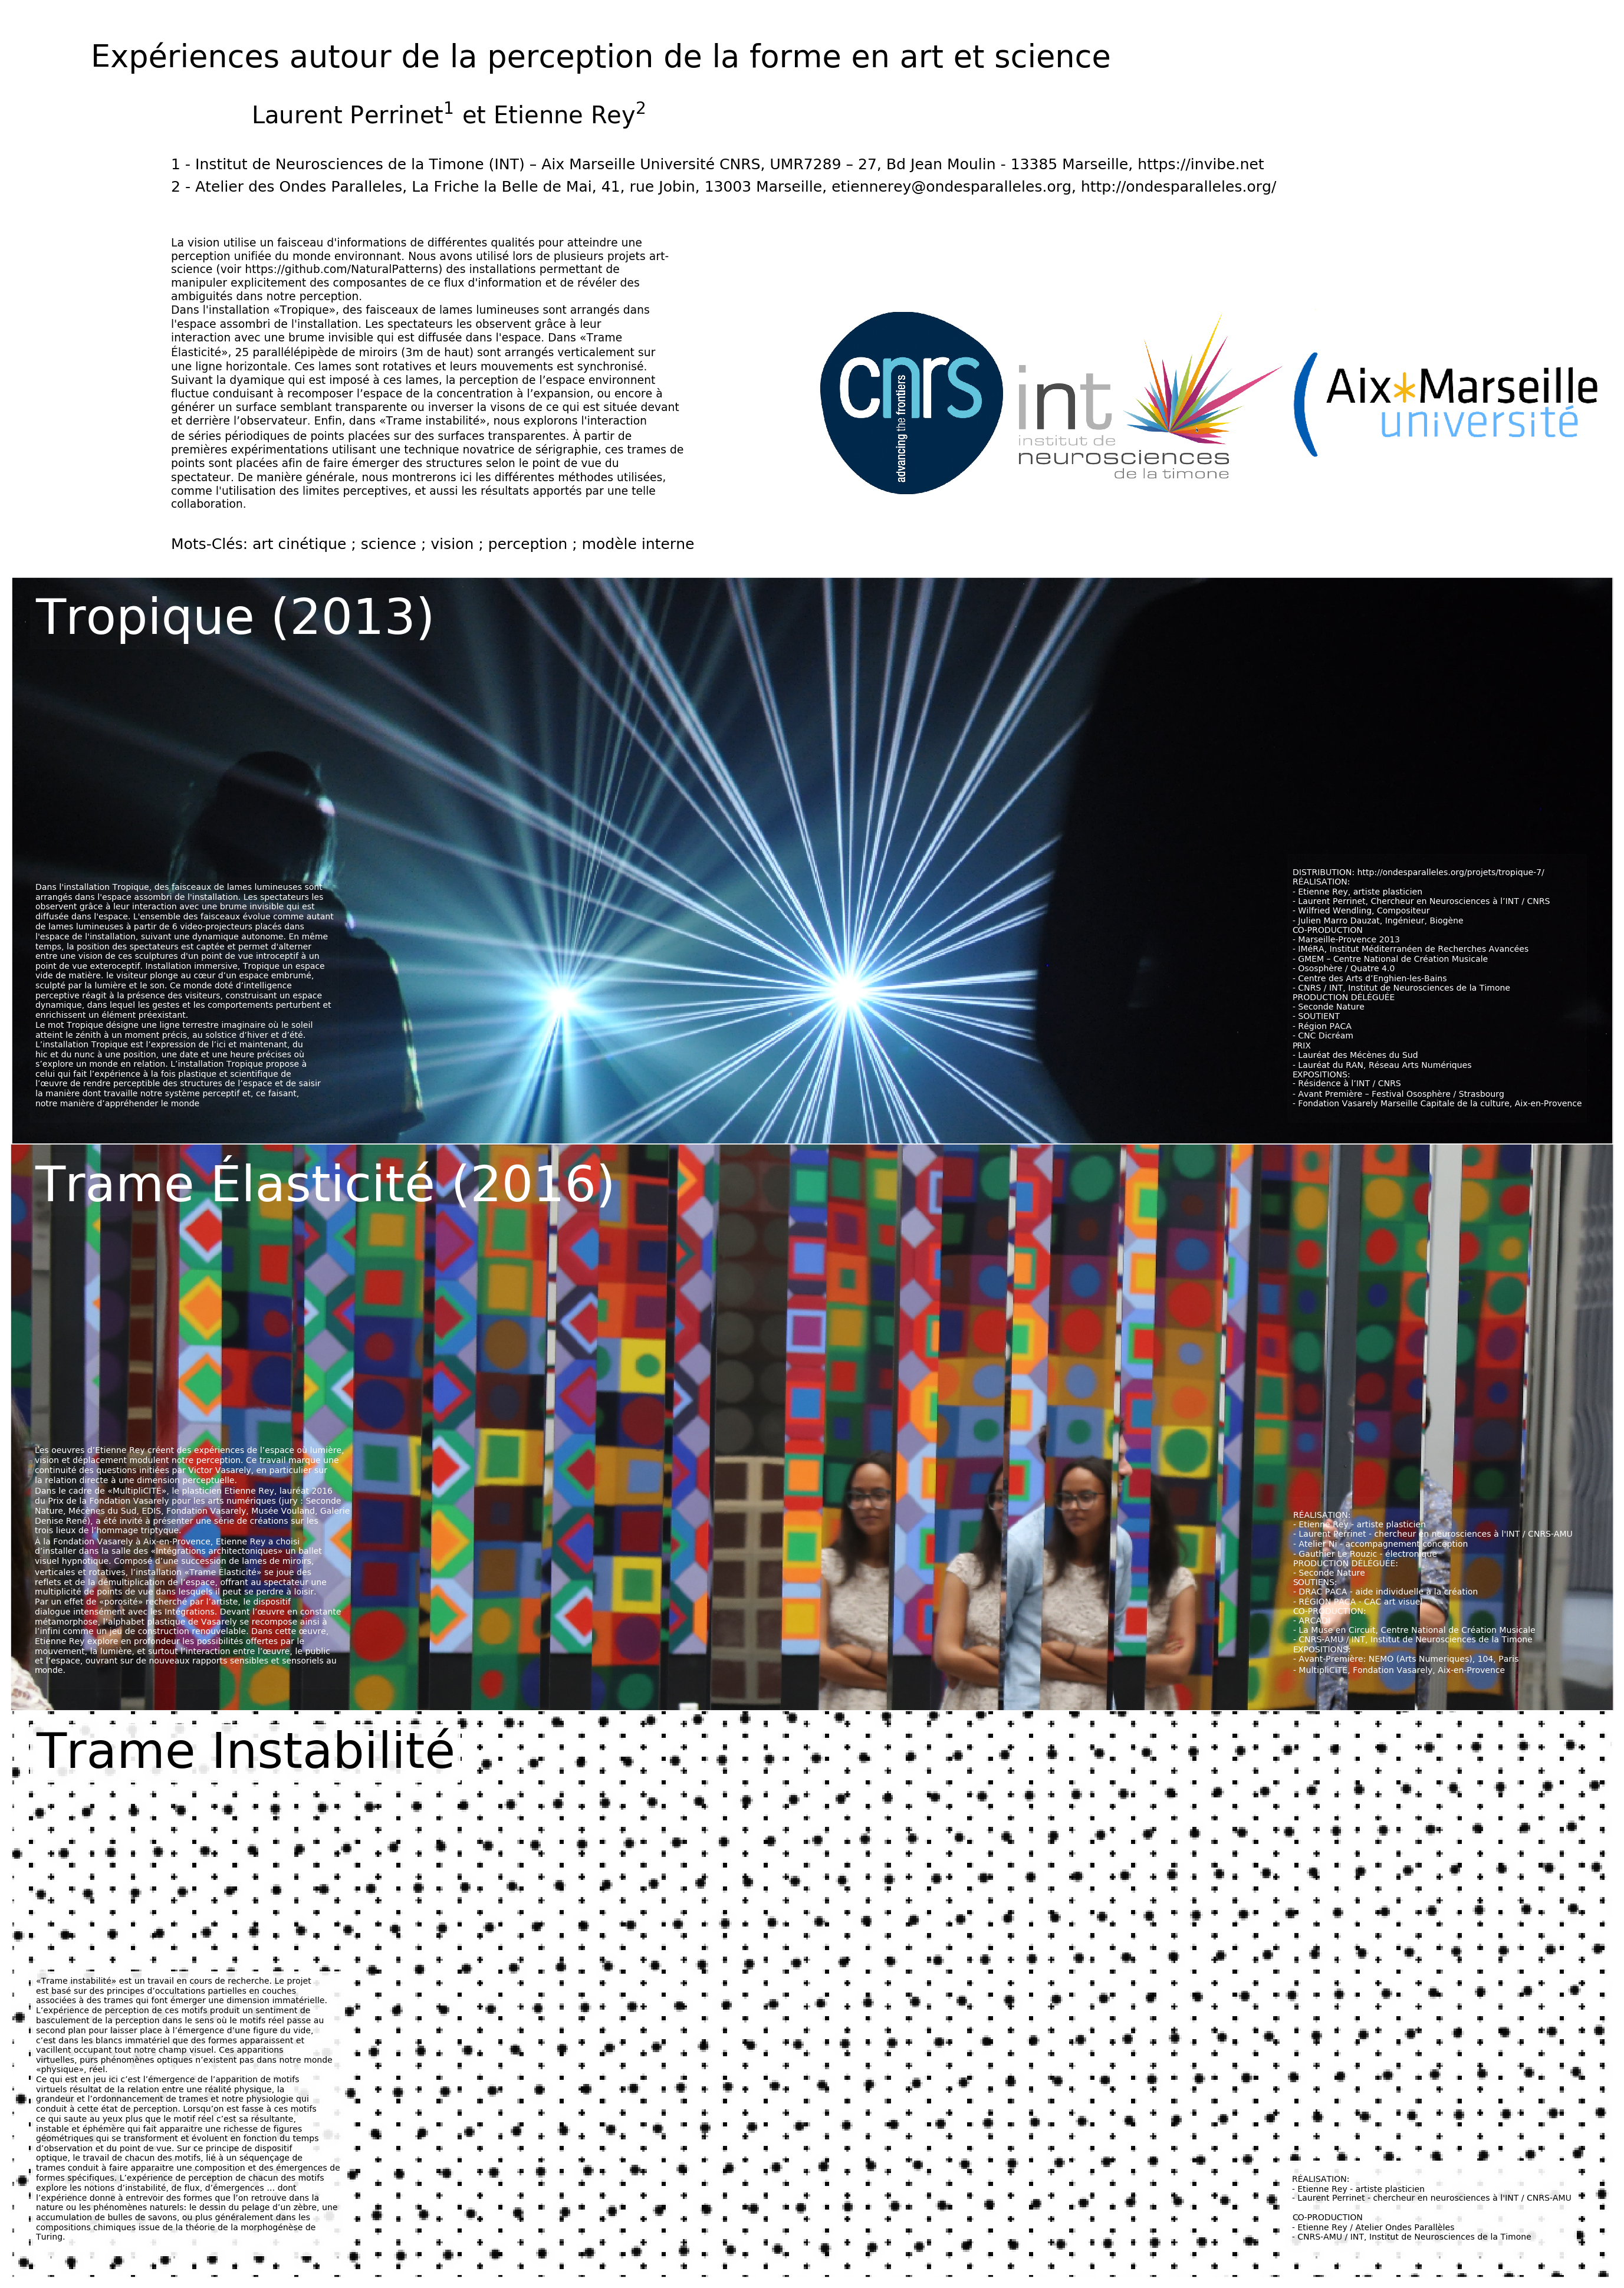

In [10]:
left_tops = [[400, 500], [800, 700], [500, 500]]
heights = [1300, 1500, 800]

crops = [None]
for lt, h in zip(left_tops, heights):
    crops.append([lt[0], int(lt[0]+h), lt[1], int(lt[1]+h*aspect_ratio)])
    
subplotpars = matplotlib.figure.SubplotParams(left=0., right=1., bottom=0., top=1., wspace=0.0, hspace=0.0,)
fig, axs = plt.subplots(4, 1, figsize=figsize, subplotpars=subplotpars)

# banner
ax = axs[0]

for x, y, text, fontsize in zip(xs, ys, texts, fontsizes):
    ax.text (s=text, x=x, y=y, usetex=False, wrap=True, 
             transform=ax.transAxes, fontsize=fontsize * 10*2**(-A_N)) # bbox=dict(facecolor='red', alpha=0.5))

color_axis(ax)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
axins = inset_axes(ax,
                   #bbox_to_anchor = [10, 10],
                   width="50%",  # width = 30% of parent_bbox
                   height= 4* 2**(4-A_N),  # width = 30% of parent_bbox
                   loc=4
                  )

axins.imshow(imageio.imread(image_logo))
color_axis(axins)
# images
for filename, ax, crop, data in zip([None, image_tropique, image_elasticité, image_trame], axs, crops, datas):
    if not filename is None:
        image = imageio.imread(filename)
        print ('The shape of', filename, ' is', image.shape)
        print ('We crop at', crop)
        ax.imshow(image[crop[0]:crop[1], crop[2]:crop[3]][::DOWNSCALE, ::DOWNSCALE, ...])
        opts = dict(usetex=False, wrap=True, transform=ax.transAxes, bbox=dict(facecolor='white', alpha=data['alpha'], edgecolor='white'), color=data['color'])
        ax.text (s=data['title'], x=.015, y=.9, fontsize=data['fontsize'], **opts)
        ax.text (s=wrap(data['description'], width=data['width']), x=.015, y=.05, fontsize=data['fontsize']/6, **opts)
        #ax.text (s=wrap(data['cartel'], width=data['width']), x=.8, y=.05, fontsize=data['fontsize']/6, **opts)
        ax.text (s=data['cartel'], x=.8, y=.05, fontsize=data['fontsize']/6, **opts)

    color_axis(ax)

In [11]:
fig.savefig(output, metadata=dict(Title=texts[0], Author=texts[1], Subject='GDR vision, Lille 12 octobre 2017', Keywords=texts[-1], CreationDate='2017-10-12') )

## some book keeping for the notebook

In [12]:
%load_ext watermark
%watermark

2017-10-25T14:46:22+02:00

CPython 3.6.3
IPython 6.1.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)
system     : Darwin
release    : 17.0.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


In [13]:
%load_ext version_information
%version_information numpy, matplotlib, imageio

Software versions
Python 3.6.3 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)]
IPython 6.1.0
OS Darwin 17.0.0 x86_64 i386 64bit
numpy 1.13.1
matplotlib 2.0.2
imageio 2.1.2
Wed Oct 25 14:46:22 2017 CEST